In [48]:

import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('..'))
from functions.feature_generation import FeatureGenerator

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load Data

In [4]:
X_test = pd.read_excel('../data/test/test_set.xlsx')

In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125243 entries, 0 to 125242
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      125243 non-null  float64
 1   1_red     125243 non-null  float64
 2   1_blue    125243 non-null  float64
 3   1_yellow  125243 non-null  float64
 4   2_red     125243 non-null  float64
 5   2_blue    125243 non-null  float64
 6   2_yellow  125243 non-null  float64
 7   3_red     125243 non-null  float64
 8   3_blue    125243 non-null  float64
 9   3_yellow  125243 non-null  float64
 10  4_red     125243 non-null  float64
 11  4_blue    125243 non-null  float64
 12  4_yellow  125243 non-null  float64
 13  5_red     125243 non-null  float64
 14  5_blue    125243 non-null  float64
 15  5_yellow  125243 non-null  float64
 16  6_red     125243 non-null  float64
 17  6_blue    125243 non-null  float64
 18  6_yellow  125243 non-null  float64
dtypes: float64(19)
memory usage: 18.2 MB


# Preprocess the test data

### Feature generation

In [ ]:
def estimate_sampling_rate(df, time_col='Time'):
    """
        computing sampling rate for test data
    """
    time_diffs = df[time_col].diff().dropna()
    avg_interval = time_diffs.mean()
    return 1 / avg_interval

In [11]:
# call function to compute sampling rate for test data
sr = estimate_sampling_rate(X_test)
print(f"Test data: Estimated Sampling Rate = {sr:.2f} Hz")

Test data: Estimated Sampling Rate = 2048.00 Hz


In [14]:
# calculate window size for test data
window_size = int(sr * 0.5)
print(window_size)

1024


Will be using feature set 3 which consist of the original, temporal and rolling features

In [19]:
df_copy = X_test.copy()

feature_generator = FeatureGenerator(window_size=window_size, sampling_rate=sr)
feature_cols = [col for col in df_copy.columns if col != 'Time']

X_test_features = feature_generator.add_rolling_features(df_copy, feature_cols)
X_test_features = feature_generator.add_temporal_changes(df_copy, feature_cols)

In [20]:
X_test_features

,Time,1_red,1_blue,1_yellow,2_red,2_blue,2_yellow,3_red,3_blue,3_yellow,...,3_yellow_diff,4_red_diff,4_blue_diff,4_yellow_diff,5_red_diff,5_blue_diff,5_yellow_diff,6_red_diff,6_blue_diff,6_yellow_diff
0,0.000000,-12.057262,-4.761482,-8.601844,87.792969,-32.508892,-32.194313,-35.198792,-32.017544,-31.783356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000488,-4.739696,-3.143384,-8.263125,88.090309,-27.136887,-32.596123,-36.028408,-33.828205,-32.184719,...,-0.401363,-0.557338,-0.373635,-2.562664,-0.624911,-1.405859,0.243067,0.218293,1.254157,-1.502557
2,0.000977,-2.906941,-3.239572,-8.387451,87.913673,-24.687252,-32.022110,-36.100342,-34.621265,-31.831137,...,0.353582,0.749523,0.776011,1.338920,0.754700,2.529574,0.559051,1.853042,0.121058,0.364698
3,0.001465,-3.494897,-2.952662,-7.852284,88.131790,-24.004410,-31.663351,-35.735886,-33.608440,-33.106903,...,-1.275766,0.523708,-1.101744,-0.609472,-0.230736,-1.804755,-0.952819,-2.556423,-0.266328,0.773160
4,0.001953,-6.263673,-4.322896,-8.325050,87.964256,-27.370867,-32.567425,-35.371429,-29.896343,-32.003151,...,1.103752,-0.470856,1.417896,-0.623869,-0.596069,0.539967,1.045185,1.401909,1.554379,0.812062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125238,61.151367,-12.351644,-3.332585,-7.842428,90.873421,-21.406748,-32.600906,-36.071568,-34.430168,-34.779259,...,-2.776108,0.432415,-1.671775,-0.086382,-3.417780,-0.807517,-1.507009,-0.863461,-1.389741,-0.340385
125239,61.151855,-11.100656,-2.585288,-7.558565,91.508781,-9.335255,-31.361994,-35.510498,-33.976307,-31.855028,...,2.924231,-0.293083,2.007089,0.004799,2.855360,1.201546,0.782672,-0.567554,-0.624657,0.564066
125240,61.152344,-7.219337,-2.556435,-7.845759,92.027985,9.077592,-31.950359,-33.846470,-32.629059,-31.205198,...,0.649830,1.196358,0.340103,2.826610,0.826805,-0.355112,0.315985,0.291053,1.360686,-0.165330
125241,61.152832,1.920489,-1.728094,-7.627423,92.352089,0.205427,-31.228058,-34.791176,-33.460339,-31.855028,...,-0.649830,0.283474,0.364054,-1.377313,-1.581505,1.848536,-0.695169,1.367955,-0.493914,-0.102115


### Scaling 

In [22]:
# made this mistake earlier, should have scaled them together except time

# Step 1: Scale Time
time_scaled = MinMaxScaler().fit_transform(X_test_features[['Time']])

# Step 2: Scale Sensor Features (1:19)
sensor_features_scaled = StandardScaler().fit_transform(X_test_features.iloc[:, 1:19])

# Step 3: Scale Additional Features (20 onward)
additional_features_scaled = StandardScaler().fit_transform(X_test_features.iloc[:, 19:])

# Step 4: Combine all scaled features for future modeling
X_fully_scaled = np.hstack([time_scaled, sensor_features_scaled, additional_features_scaled])

In [37]:
# convert back to df for easier debugging
column_names = X_test_features.columns

In [38]:
X_fully_preprocessed = pd.DataFrame(X_fully_scaled, columns=column_names)

In [40]:
# save it
joblib.dump(X_fully_preprocessed, '../data/interim/07_X_test_preprocessed.joblib')

['../data/interim/07_X_test_preprocessed.joblib']

# Load model and predict

Using subset 3 and rf which have the best results from training

In [ ]:
# load trained rf model
model = joblib.load('../model/best_random_forest.joblib')

In [44]:
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [45]:
# Predict forces using your preprocessed feature set
y_pred = model.predict(X_fully_preprocessed)

In [54]:
# Convert predictions to DataFrame for export
y_pred_df = pd.DataFrame(y_pred, columns=['X (kN)', 'Y (kN)', 'Z (kN)'])

# Save the predictions to Excel
y_pred_df.to_excel('../results/predicted_forces.xlsx', index=False)

print("😄 Predictions saved to '../results/predicted_forces.xlsx'")

😄 Predictions saved to '../results/predicted_forces.xlsx'


# Visualize the results

In [181]:
def plot_force_components(df, split_index, prefix='', title_prefix='Predicted Force', separate=True):
    """
    Plots X, Y, Z force components either in separate or combined graphs.
    Highlights values after split_index in red.
    
    Parameters:
    - df: DataFrame containing the force columns.
    - split_index: Index after which to highlight in red.
    - prefix: Optional prefix before 'X (kN)', 'Y (kN)', 'Z (kN)' in column names.
    - title_prefix: Optional title prefix for each plot or combined plot.
    - separate: If True, plots separately; if False, plots all together.
    """
    base_colors = {'X': '#1f77b4', 'Y': '#ff7f0e', 'Z': '#2ca02c'}
    highlight_color = 'red'
    axes_found = []

    if separate:
        for axis in ['X', 'Y', 'Z']:
            col_name = f'{prefix}{axis} (kN)'
            if col_name in df.columns:
                plt.figure(figsize=(10, 4))
                plt.plot(df.index[:split_index], df[col_name].iloc[:split_index], color=base_colors[axis], label='Training label')
                plt.plot(df.index[split_index:], df[col_name].iloc[split_index:], color=highlight_color, label='Test label prediction')
                plt.title(f'{title_prefix} {axis} (kN)', fontsize=14)
                plt.xlabel('Sample Index', fontsize=12)
                plt.ylabel('Force (kN)', fontsize=12)
                plt.legend()
                plt.grid(True)
                plt.show()
            else:
                print(f"Column '{col_name}' not found in DataFrame.")
    else:
        plt.figure(figsize=(12, 5))
        for axis in ['X', 'Y', 'Z']:
            col_name = f'{prefix}{axis} (kN)'
            if col_name in df.columns:
                plt.plot(df[col_name], label=col_name, color=base_colors[axis])
                axes_found.append(axis)
            else:
                print(f"Column '{col_name}' not found in DataFrame.")
        if axes_found:
            plt.title(title_prefix, fontsize=14)
            plt.xlabel('Sample Index', fontsize=12)
            plt.ylabel('Force (kN)', fontsize=12)
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("No matching force columns found to plot.")

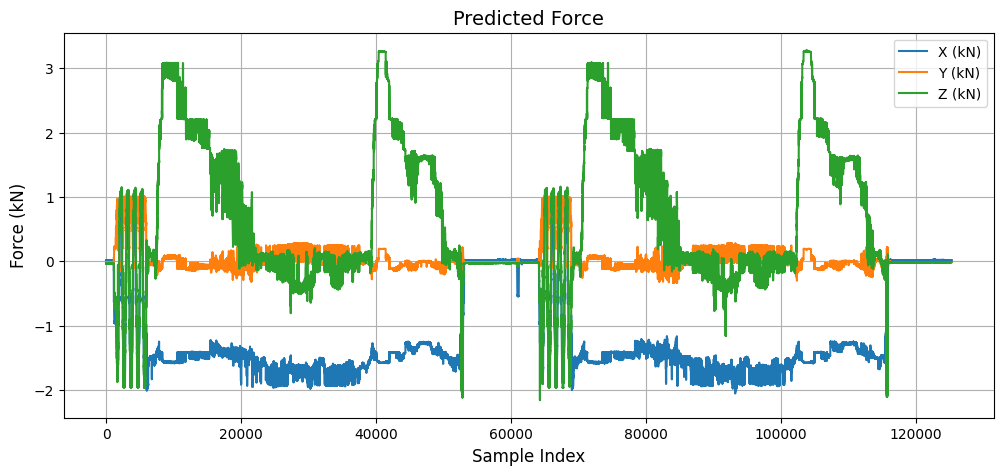

In [182]:
# Plot from combined DataFrame
plot_force_components(y_pred_df, split_index=374976, separate=False)

### Plotting Training label against Predicted test results

In [152]:
y_data = joblib.load('../data/interim/02_y_aligned_list.joblib')

In [147]:
y_combined = pd.concat(y_data, axis=0, ignore_index=True)

In [154]:
combined_y_df = pd.concat([y_combined, y_pred_df], axis=0, ignore_index=True)

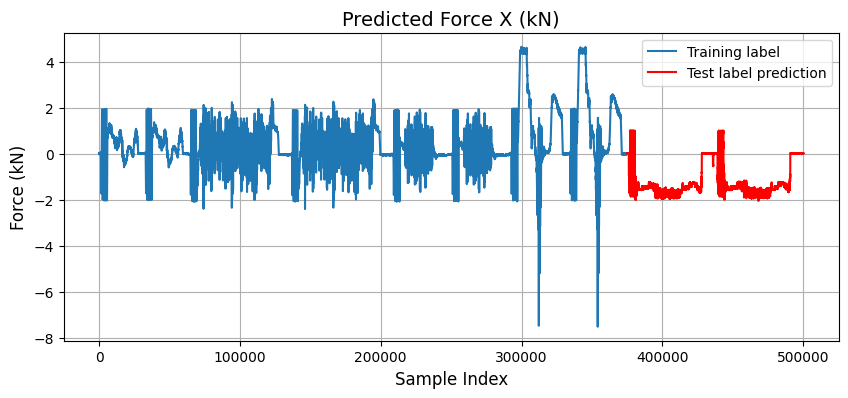

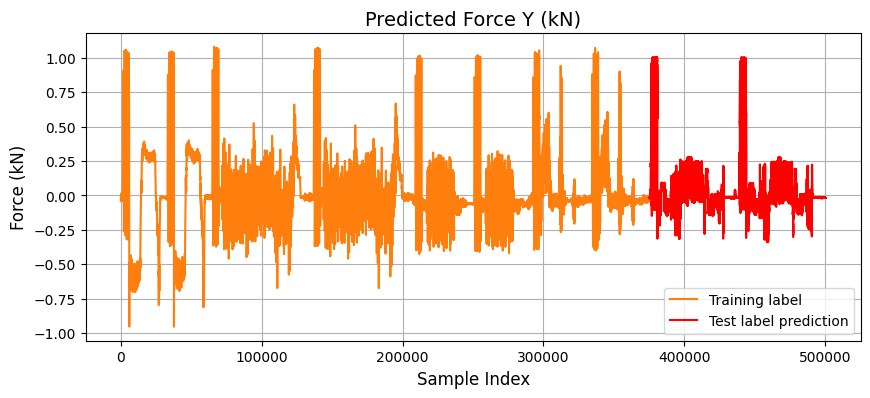

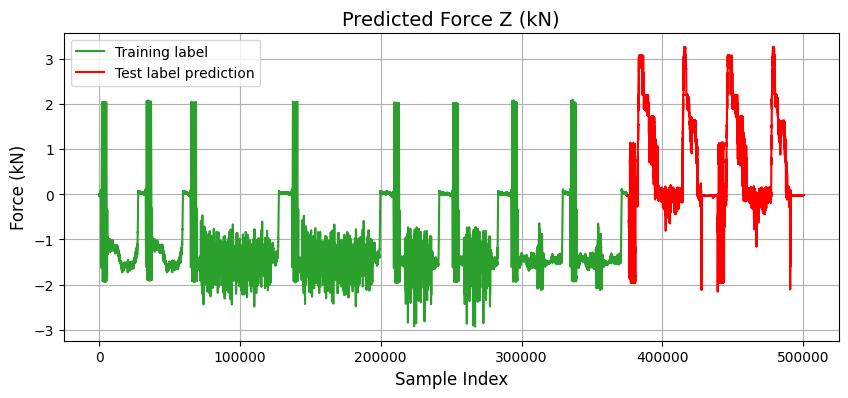

In [183]:
# Plot from combined DataFrame
plot_force_components(combined_y_df, split_index=374976)

### Plotting raw training data against raw testing data

In [156]:
X_train = joblib.load('../data/interim/01_X_aligned_list.joblib')

In [157]:
X_combined = pd.concat(X_train, axis=0, ignore_index=True)

In [158]:
combined_x_df = pd.concat([X_combined, X_test], axis=0, ignore_index=True)

In [179]:
def plot_all_columns(df, split_index, title_prefix="Feature"):
    """
    Plots all columns of a DataFrame, highlighting values after split_index in red.
    """
    for col in df.columns:
        plt.figure(figsize=(10, 4))
        plt.plot(df.index[:split_index], df[col].iloc[:split_index], label='Training Data', color='blue')
        plt.plot(df.index[split_index:], df[col].iloc[split_index:], label='Test Data', color='red')
        plt.title(f"{title_prefix}: {col}")
        plt.xlabel("Index")
        plt.ylabel(col)
        plt.legend()
        plt.show()


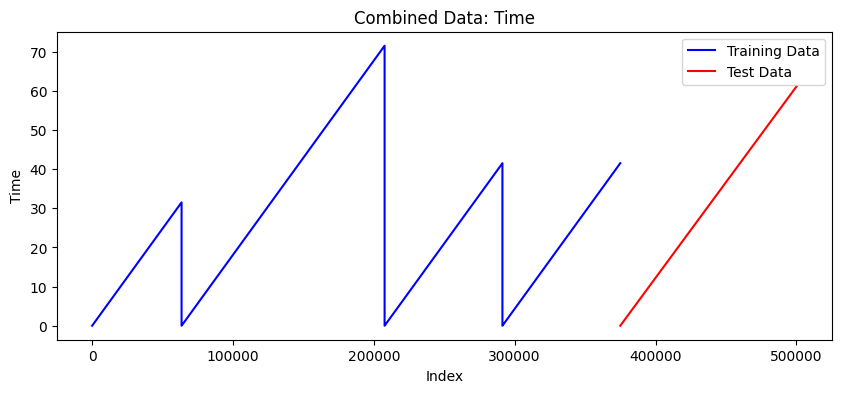

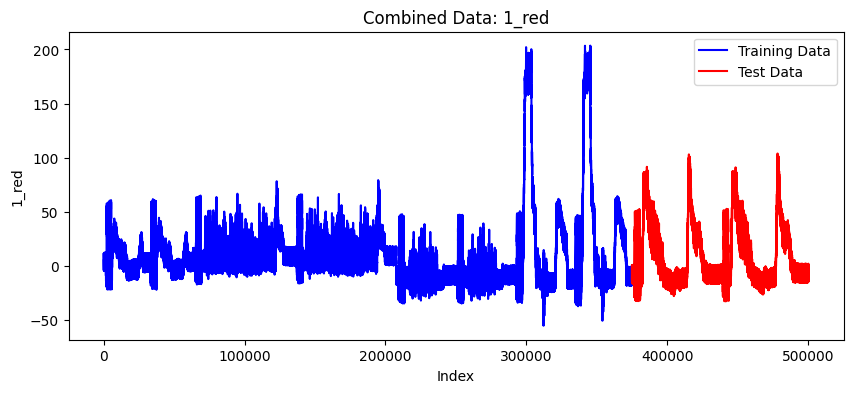

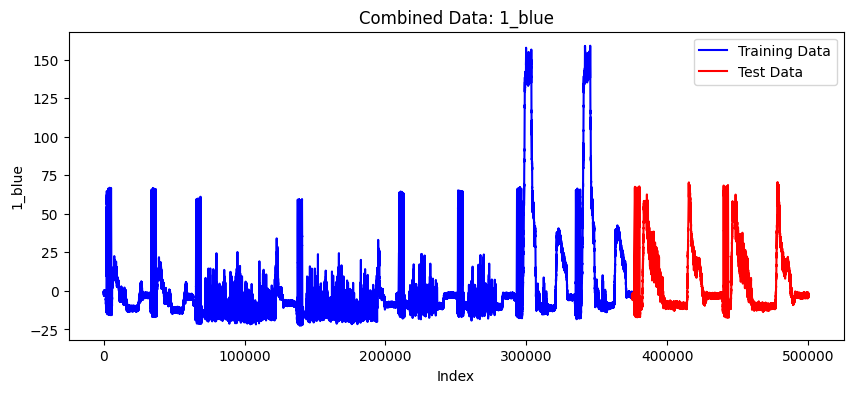

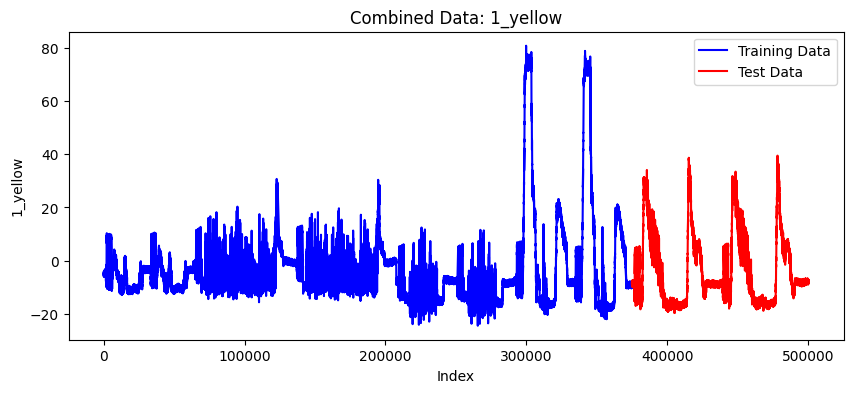

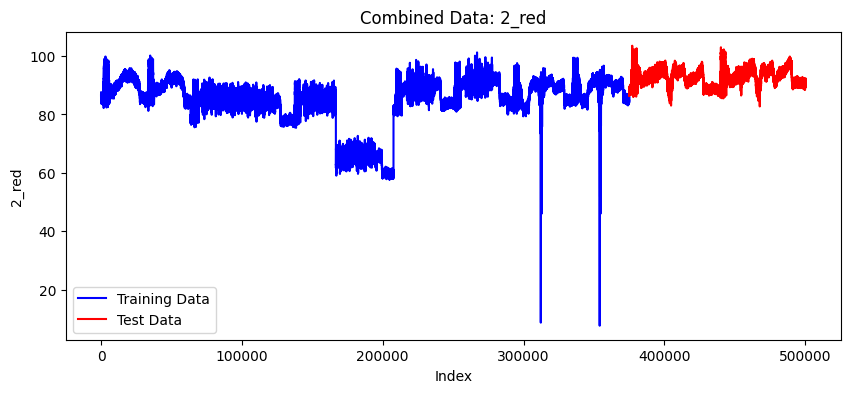

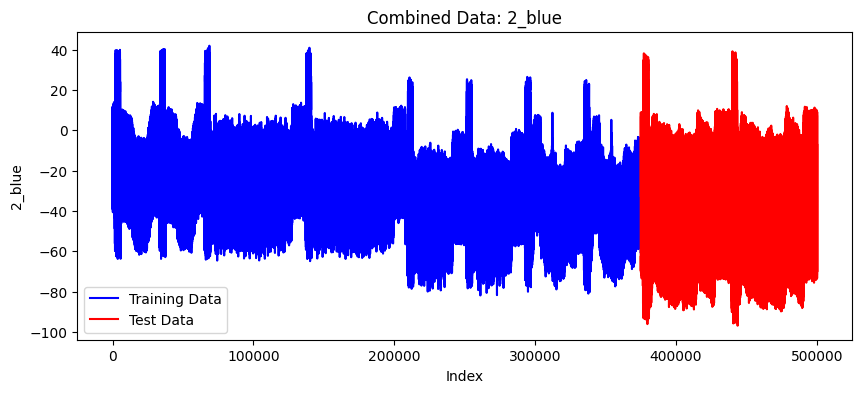

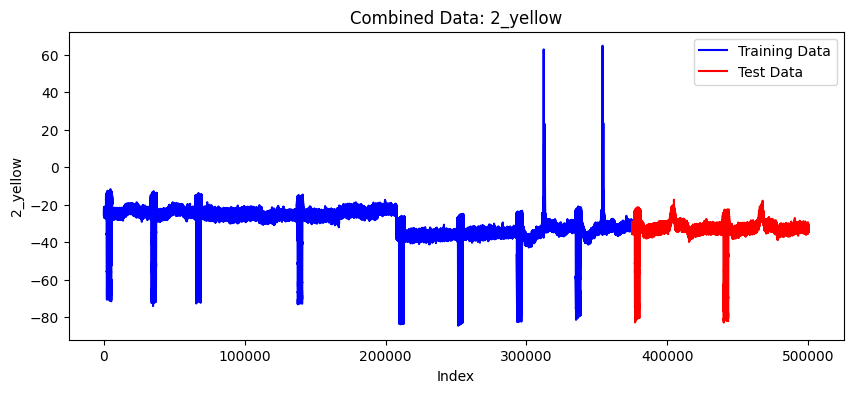

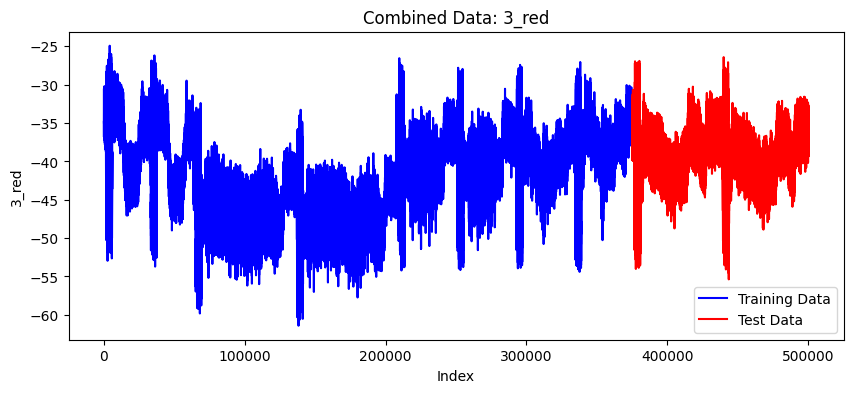

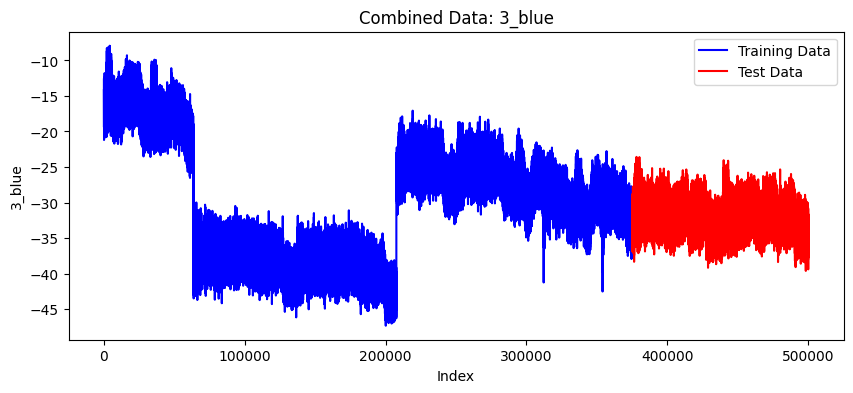

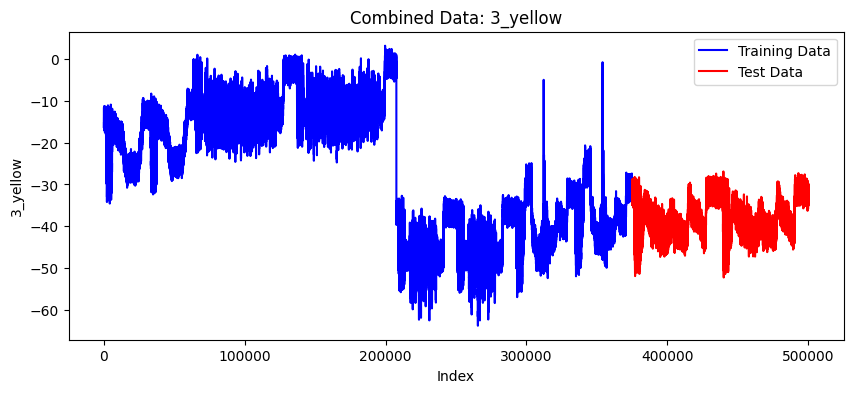

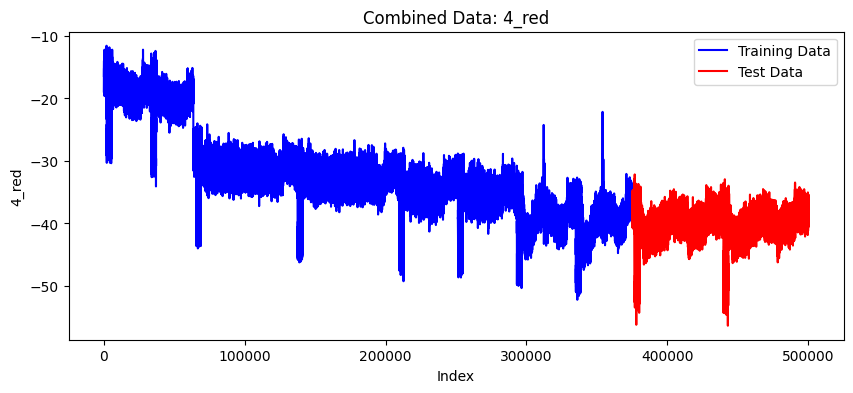

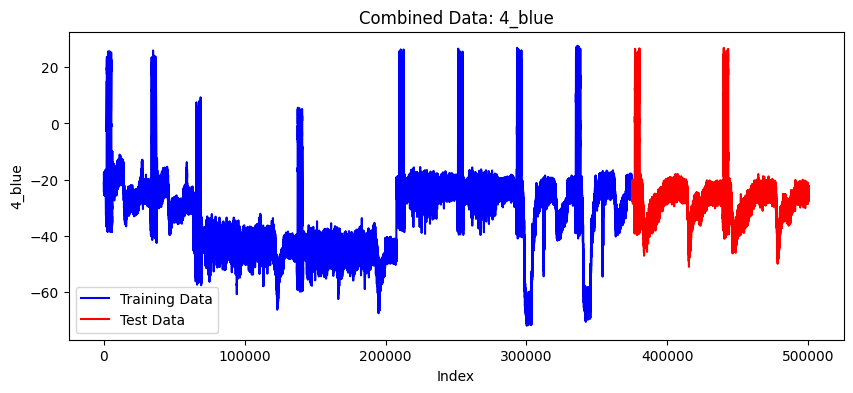

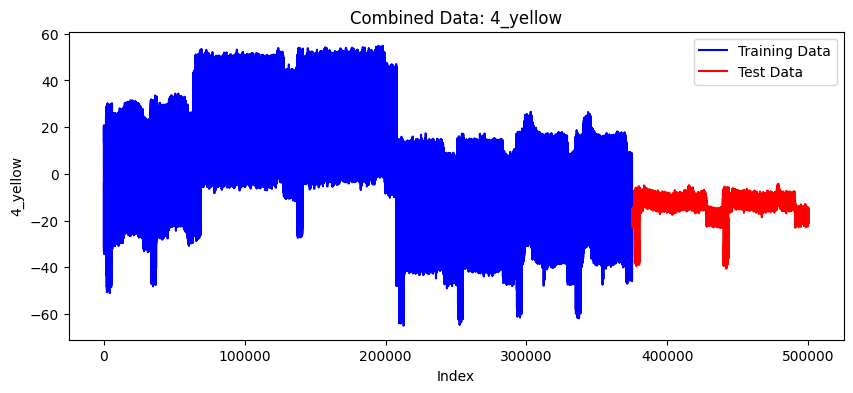

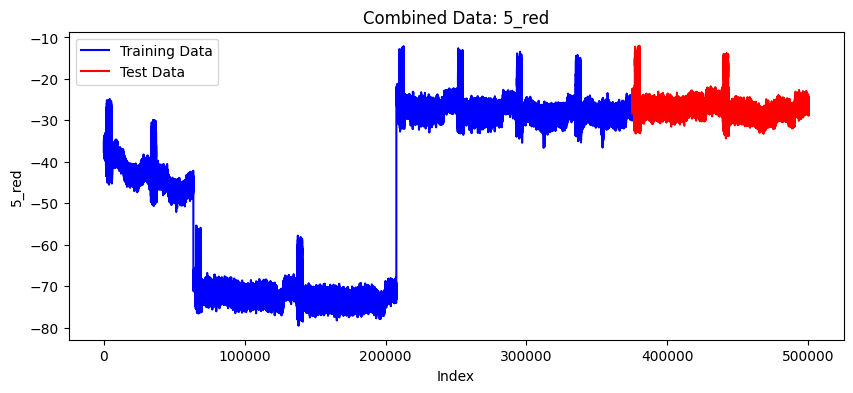

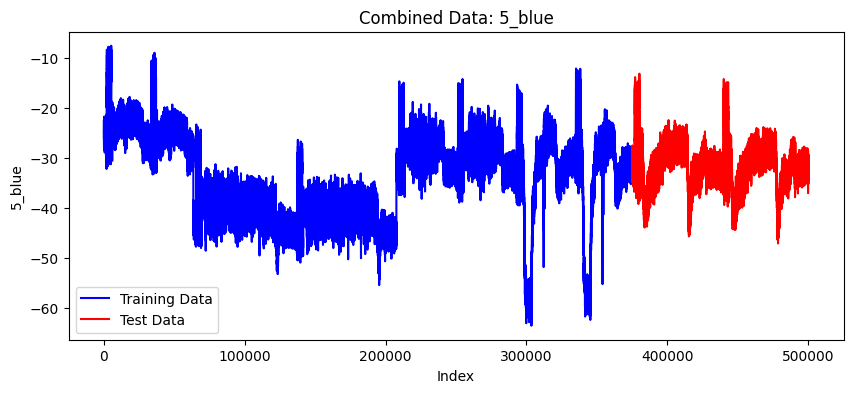

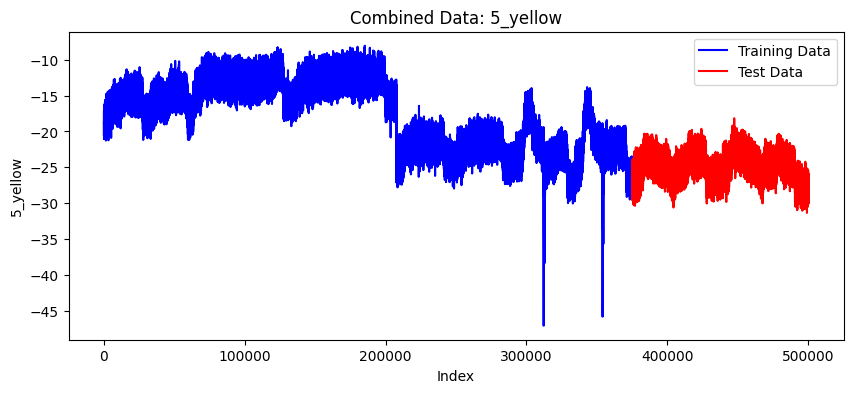

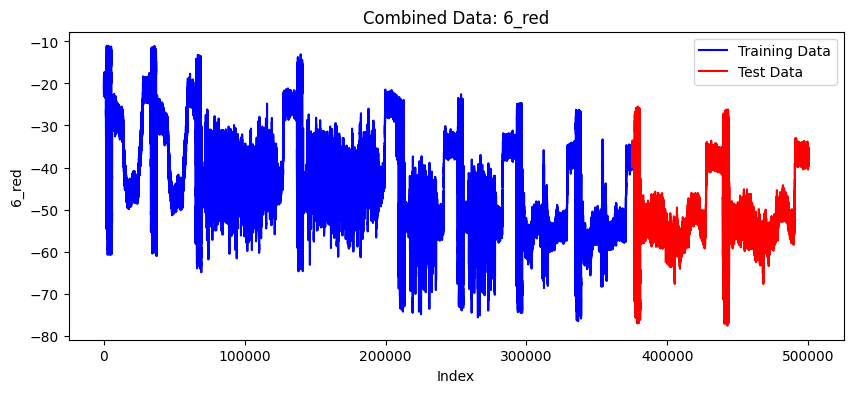

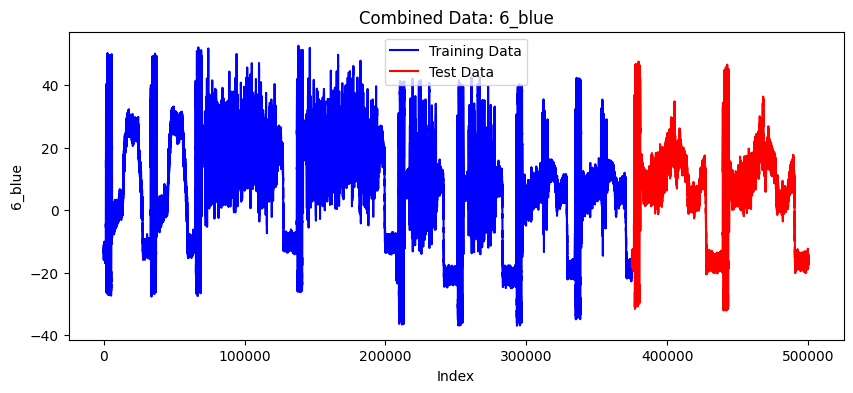

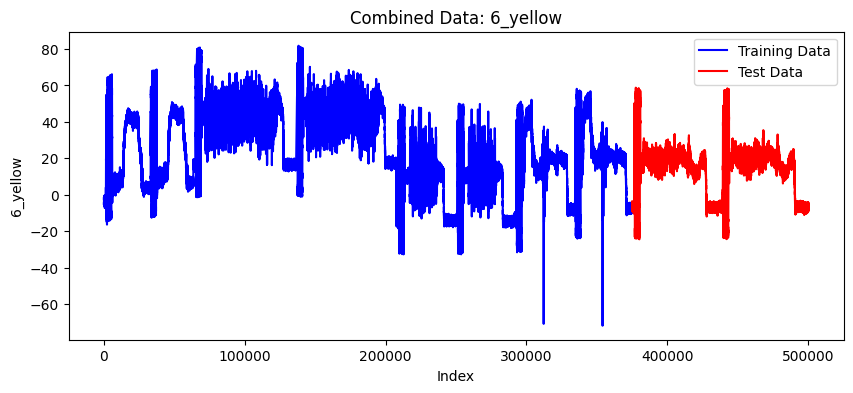

In [180]:
plot_all_columns(combined_x_df, split_index=374976, title_prefix="Combined Data")
